In [1]:
from astropy.io import fits
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
import os
from importlib import reload
import matplotlib.pylab as pl
from importlib import reload
import pandas as pd
import glob

# personal
import sparkles.spark as spkl
import sparkles.log_readers as lr

In [2]:
from importlib import reload
reload(lr)

<module 'sparkles.log_readers' from '/home/eden/code/sparkles/sparkles/log_readers.py'>

In [3]:
# calibration files
dir_calib = '../data/calib/'
mask = 'aol1_wfsmask.fits'
ref = 'aol1_wfsref.fits'
dark = 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20220422005142597501326.fits'
log_dir = "/home/eden/data/2023A/log/"

## SelfRM vs. Seeing plot

In [9]:
merged_f = log_dir + "merge_spk_tsci.csv"
df_seeing_param  = pd.read_csv(merged_f)

In [12]:
RM_dir23A_lab = "/home/eden/data/2023A/selfRMs/LAB/"
RM_dir23A_sky = "/home/eden/data/2023A/selfRMs/SKY/"
self_RM_lab_list = os.listdir(RM_dir23A_lab)
self_RM_sky_list = os.listdir(RM_dir23A_sky)
# split this list into lab and not lab

In [25]:
# create a df using the sparkle parameter lists
for tmp in self_RM_sky_list:
    print(tmp)
    qry = lr.query_teldump_csv_selfRM(RM_dir23A_sky+tmp, merged_f)
    #print(qry)


selfRM_20230304_05_piPup_sparkles_nottriggered.fits
selfRM_20230304_05_piPup_sparkles_triggered.fits
selfRM_20230305_06_betaPic_sparkles_triggered.fits
selfRM_20230307_08_betaPic_sparkles_trigger_sep20_amp02.fits
selfRM_20230309_10_cutoff.fits
selfRM_20230309_10_HR4796a_sparkles.fits
selfRM_20230309_10_noSpark_1200Hz.fits
selfRM_20230310_11_no_sparkles_HD72946b.fits
selfRM_20230310_11_no_sparkles_HD72946b_lower_gain_02.fits
selfRM_20230310_11_trig_sparkles_HD72946b_15ld_05.fits
selfRM_20230311_12_TWA7_sparkles_sep15_amp02.fits
selfRM_20230312_13_HD106906_sep15_amp_02.fits
selfRM_20230312_13_HR2562_sep15_amp_02_05gains.fits
selfRM_20230312_13_HR2562_sep15_amp_02.fits
selfRM_20230312_13_PSF-HD144271_sep13_amp02.fits
selfRM_20230313_14_HD100546_sep15_amp016.fits
selfRM_20230316_0055_BetaPic_spark_020amps_22seps.fits
selfRM_20230316_0250_BetaPic_spark_020amps_22seps.fits
selfRM_20230316_0305_BetaPic_spark_020amps_22seps.fits
selfRM_20230316_HD143006_spark_020amps_20seps.fits
selfRM_2023031

## Checking 1800 loop stability

In [6]:
data_home_dir = '/home/eden/data/'

lab_1799_f = data_home_dir+'2023A/03_11_lab_1800_sparkles_amp010_onoff/camwfs/'
lab_1800_f = data_home_dir+'2023A/03_08_sparkles_selfRM_1800/camwfs/'

In [26]:
# create sparkle object
reload(spkl)
# Sky sparkles
sp_lab_1799 = spkl.Spark(lab_1799_f, lab_1799_f, dir_calib, dark, mask, ref)
data_split_l_1799 = np.array(spkl.split_data_roll(np.array(sp_lab_1799.dot_list_pool(n=100000, n_workers=60))))

=> Sampling 100 files, starting at 0
100
HZ value: 1800
HZ value: 1800
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.01   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.01   CROSS : 1  
ERROR: changing n_end to file count
chunksize=40, n_workers=60


In [27]:
sp_lab_1800 = spkl.Spark(lab_1800_f, lab_1800_f, dir_calib, dark, mask, ref)
data_split_l_1800 = np.array(spkl.split_data_roll(np.array(sp_lab_1800.dot_list_pool(n=100000, n_workers=60))))

=> Sampling 100 files, starting at 0
100
HZ value: 1800
HZ value: 1800
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
chunksize=1667, n_workers=60


In [31]:
lab_t_dir_0305 = "/home/eden/data/2023A/0305_lab_triggered/camwfs/"
sp_lab_t_1799= spkl.Spark(lab_t_dir_0305, lab_t_dir_0305, dir_calib, dark, mask, ref)
data_split_t_1799= np.array(spkl.split_data_roll(np.array(sp_lab_t_1799.dot_list_pool(n=100000, n_workers=60))))

=> Sampling 100 files, starting at 0
100
HZ value: 1800
HZ value: 1800
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.05   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.05   CROSS : 1  
chunksize=1667, n_workers=60


In [28]:
# don't have currrent 1800 triggered data, pulling from the 1800

lab_dir_1213 = "/home/eden/data/2022B/12_12_spark_selfRM/selfRM_sparkles_20221212T063523/camwfs/" 
sp_lab_1800r = spkl.Spark(lab_dir_1213, lab_dir_1213, dir_calib, dark, mask, ref)
data_split_l_1800r = np.array(spkl.split_data_roll(np.array(sp_lab_1800r.dot_list_pool(n=100000, n_workers=60))))

=> Sampling 100 files, starting at 0
100
HZ value: 1800
HZ value: 1800
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 20   ANGS : 0   AMPS : 0.015   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 20   ANGS : 0   AMPS : 0.015   CROSS : 1  
chunksize=1667, n_workers=60


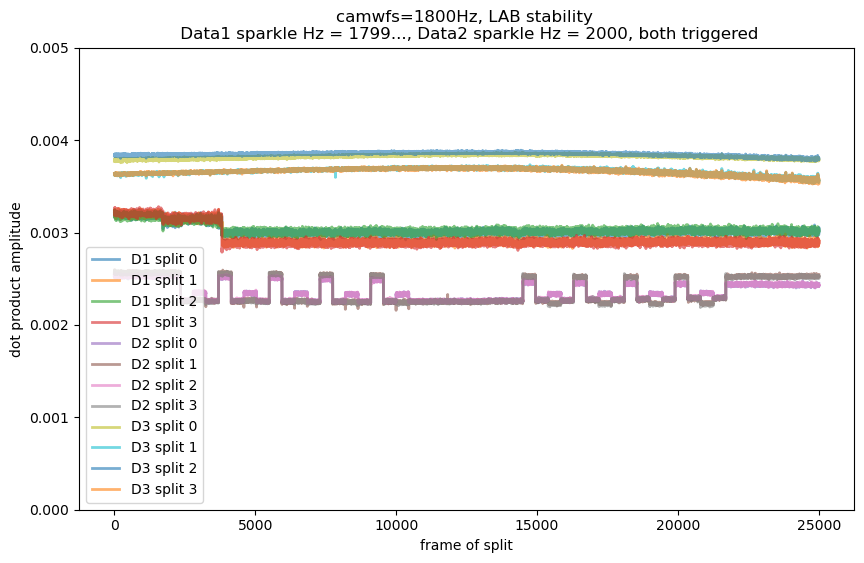

In [33]:
# Dotproduct onsky dataset NOTTRIG
fig = plt.figure(figsize=(10,6), facecolor='white')

for e in range(4):
    plt.plot(data_split_l_1800[e], lw=2, alpha = 0.6, label = f'D1 split {e}')
for e in range(4):
    plt.plot(data_split_l_1800r[e], lw=2, alpha = 0.6, label = f'D2 split {e}')
for e in range(4):
    plt.plot(data_split_t_1799[e], lw=2, alpha = 0.6, label = f'D3 split {e}')

plt.legend()
plt.ylim(top=0.005, bottom = 0.0)
plt.xlabel('frame of split')
plt.ylabel('dot product amplitude')
plt.title(f"camwfs=1800Hz, LAB stability \n Data1 sparkle Hz = 1799..., Data2 sparkle Hz = 2000, both triggered")
plt.show()

### Intentionally changing sparkle LAB freq

In [11]:
data_home_dir = '/home/eden/data/'

lab_frq_test = data_home_dir + '2023A/03_13_LAB_sparkle_frq_test/camwfs/'

In [16]:
# for element in WFS, check the sparkle frequency
import shutil
dir_list = os.listdir(lab_frq_test)
dir_list.sort()

for file in dir_list:
    tmp_path = lab_frq_test + file
    hdr = spkl.get_hdr_from_file(tmp_path)
    tmp_freq =  hdr['HIERARCH TWEETERSPECK FREQUENCY']
    frq_path = lab_frq_test.replace('camwfs/', f'frq{int(tmp_freq)}/camwfs/')
    os.makedirs(frq_path, exist_ok=True)
    shutil.move(tmp_path, frq_path)

In [17]:
lab_frq_1 = data_home_dir + '2023A/03_13_LAB_sparkle_frq_test/frq1/camwfs/'
lab_frq_1799 = data_home_dir + '2023A/03_13_LAB_sparkle_frq_test/frq1799/camwfs/'
lab_frq_2000 = data_home_dir + '2023A/03_13_LAB_sparkle_frq_test/frq2000/camwfs/'

In [ ]:
# Lab sparkles @ frq 1Hz
sp_frq_1 = spkl.Spark(lab_frq_1, lab_frq_1, dir_calib, dark, mask, ref)
sp_frq_1799 = spkl.Spark(lab_frq_1799, lab_frq_1799, dir_calib, dark, mask, ref)
sp_frq_2000 = spkl.Spark(lab_frq_2000, lab_frq_2000, dir_calib, dark, mask, ref)

In [35]:
# Lab sparkles @ frq 1Hz
sp_frq_1.set_lab_ref(n_start=1000)
data_split_frq_1 = np.array(spkl.split_data_roll(np.array(sp_frq_1.dot_list_pool(n=80000, n_workers=60))))
# Lab sparkles @ frq 1799Hz
data_split_frq_1799 = np.array(spkl.split_data_roll(np.array(sp_frq_1799.dot_list_pool(n=80000, n_workers=60))))
# Lab sparkles @ frq 2000Hz
data_split_frq_2000 = np.array(spkl.split_data_roll(np.array(sp_frq_2000.dot_list_pool(n=80000, n_workers=60))))

GENERATING REFERENCE
=> Sampling 100 files, starting at 1000
100
chunksize=1334, n_workers=60
chunksize=1334, n_workers=60
chunksize=1334, n_workers=60


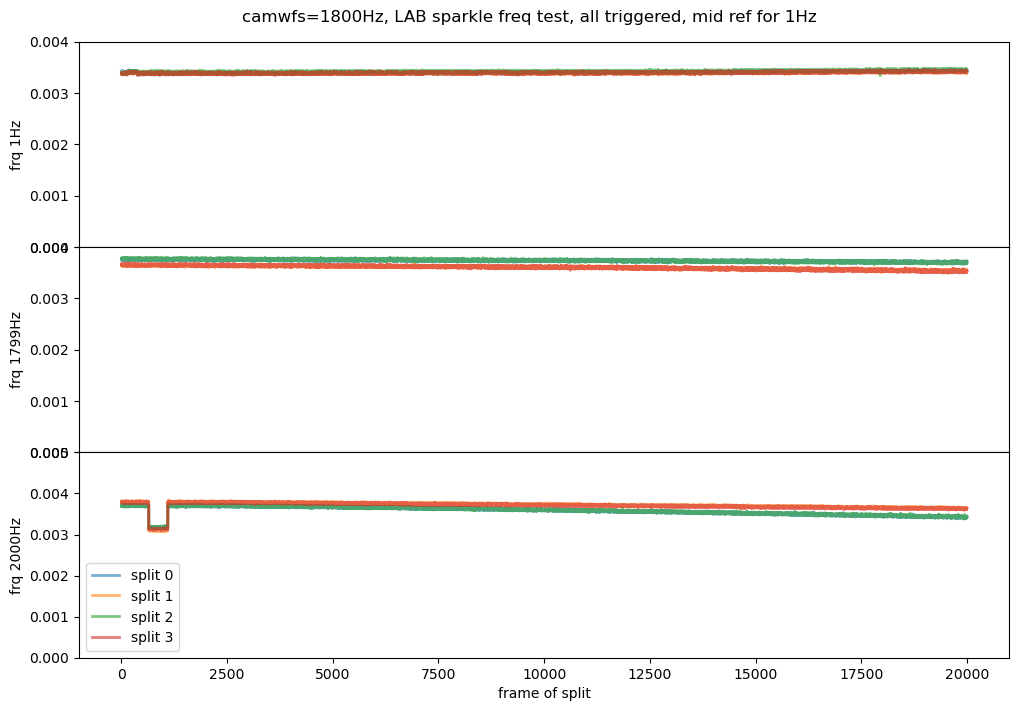

In [37]:
# Dotproduct LAB with different sparkle frequencies
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.suptitle(f"camwfs=1800Hz, LAB sparkle freq test, all triggered, mid ref for 1Hz", y=0.92)

for e in range(4):
    axs[0].plot(data_split_frq_1[e], lw=2, alpha = 0.6, label = f'split {e}')
    axs[0].set_ylabel("frq 1Hz")
    axs[0].set_ylim(top=.004, bottom=0)
for e in range(4):
    axs[1].plot(data_split_frq_1799[e], lw=2, alpha = 0.6, label = f'split {e}')
    axs[1].set_ylabel("frq 1799Hz")
    axs[1].set_ylim(top=.004, bottom=0)
for e in range(4):
    axs[2].plot(data_split_frq_2000[e], lw=2, alpha = 0.6, label = f'split {e}')
    axs[2].set_ylabel("frq 2000Hz")
    axs[2].set_ylim(top=.004, bottom=0)

plt.legend()
plt.ylim(top=0.005, bottom = 0.0)
plt.xlabel('frame of split')
plt.show()

## SelfRM testing?

In [4]:
RM_dir = "/home/eden/data/self_RMs/"
self_RM_list = os.listdir(RM_dir)
self_RM_list

['selfRM_20221208_09_knife_edge_first_light_testing_000.fits',
 'selfRM_20221208_09_sparkle_test_baseline_no_trigger_001.fits',
 'selfRM_20221208_09_sparkle_test_baseline_trigger_001.fits',
 'selfRM_HD15115_20221011_12_001.fits',
 'selfRM_sparkles_20221211_12_001.fits',
 'selfRM_sparkles_20221211_12_002.fits',
 'selfRM_sparkles_20221211_12_003.fits',
 'selfRM_sparkles_20221211_12_004.fits',
 'selfRM_sparkles_20221211_12_005.fits',
 'selfRM_sparkles_20221211_12_006.fits',
 'selfRM_sparkles_20221211_12_007.fits',
 'selfRM_sparkles_20221211_12_008.fits',
 'selfRM_TYC4865-1113-1_20221211_12_001.fits',
 'selfRM_TYC4865-1113-1_20221211_12_002.fits',
 'selfRM_20230304_05_piPup_sparkles_nottriggered.fits',
 'selfRM_20230304_05_piPup_sparkles_triggered.fits',
 'selfRM_20230311_12_LAB_spark_0600_050amps_20seps.fits',
 'selfRM_20230305_06_betaPic_sparkles_triggered.fits',
 'selfRM_BetaPic_20230308_20_002.fits',
 'selfRM_HD15115_20221212_13_001.fits',
 'selfRM_LAB_20230308_20_002.fits',
 'selfRM_2

## Long SelfRM - settling gains on sky

In [5]:
data_0312_05gain = fits.open(RM_dir + 'selfRM_20230312_13_HR2562_sep15_amp_02_05gains.fits')[0].data
data_0312_10gain  = fits.open(RM_dir + 'selfRM_20230312_13_HR2562_sep15_amp_02.fits')[0].data
data_0312_labEq = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits')[0].data

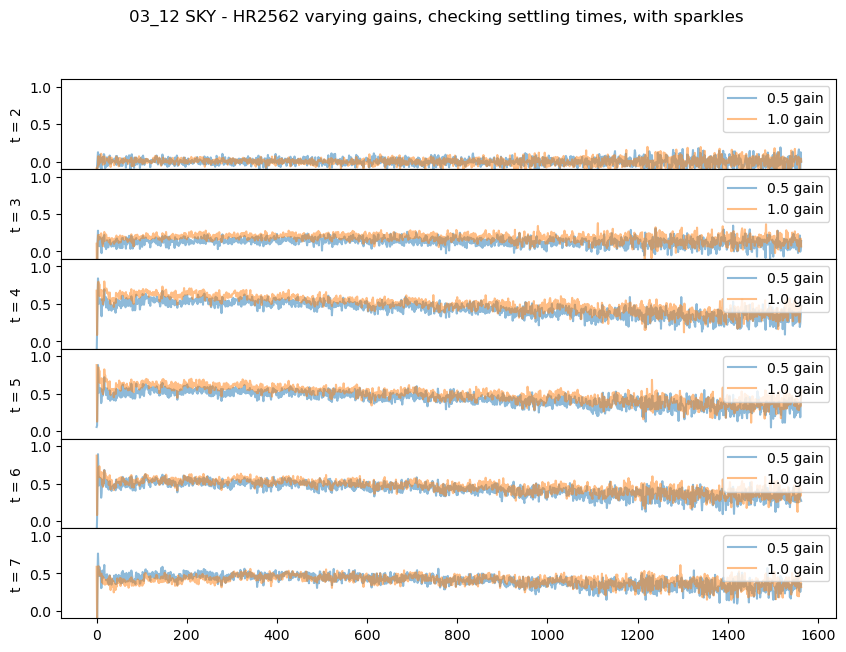

In [44]:
# Checking in-lab loop gains
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(10, 7), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.suptitle("03_12 SKY - HR2562 varying gains, checking settling times, with sparkles")

colors = pl.cm.magma(np.linspace(0,1,6))
offset = 2

for i in range(6):
    axs[i].set_ylabel(f"t = {i+offset}")
    axs[i].plot(np.diag(data_0312_05gain[i+offset]), label="0.5 gain", alpha=0.5)
    axs[i].plot(np.diag(data_0312_10gain[i+offset]), label="1.0 gain", alpha=0.5)
    axs[i].legend()
    axs[i].set_ylim(top=1.1, bottom=-0.1)
plt.show()

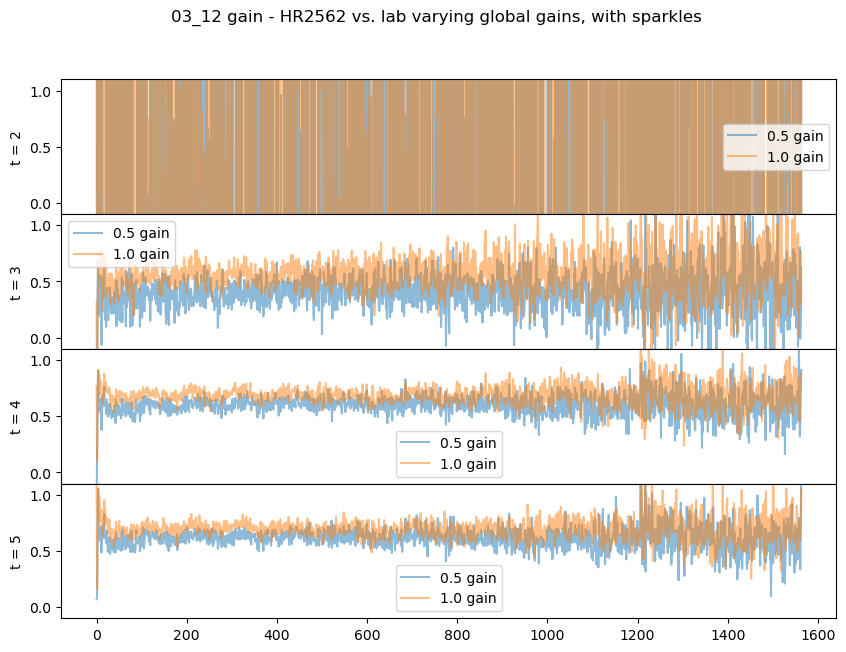

In [54]:
# div by lab gains
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 7), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.suptitle("03_12 gain - HR2562 vs. lab varying global gains, with sparkles")

colors = pl.cm.magma(np.linspace(0,1,6))
offset = 2

for i in range(4):
    axs[i].set_ylabel(f"t = {i+offset}")
    axs[i].plot(np.diag(data_0312_05gain[i+offset])/np.diag(data_0312_labEq[i+offset]), label="0.5 gain", alpha=0.5)
    axs[i].plot(np.diag(data_0312_10gain[i+offset])/np.diag(data_0312_labEq[i+offset]), label="1.0 gain", alpha=0.5)
    axs[i].legend()
    axs[i].set_ylim(top=1.1, bottom=-0.1)
plt.show()

In [ ]:
# compare to on-sky values 



## Checking Settling Time

In [6]:
data_0311_stlng = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_20stlng.fits')[0].data
data_0311_loopOff = fits.open(RM_dir + 'selfRM_20230311_12_LAB_loopOff_1800_20stlng.fits')[0].data
data_0311_zerogain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_loopOff_1800_20stlng.fits')[0].data

In [11]:
RM_dir

'/home/eden/data/self_RMs/'

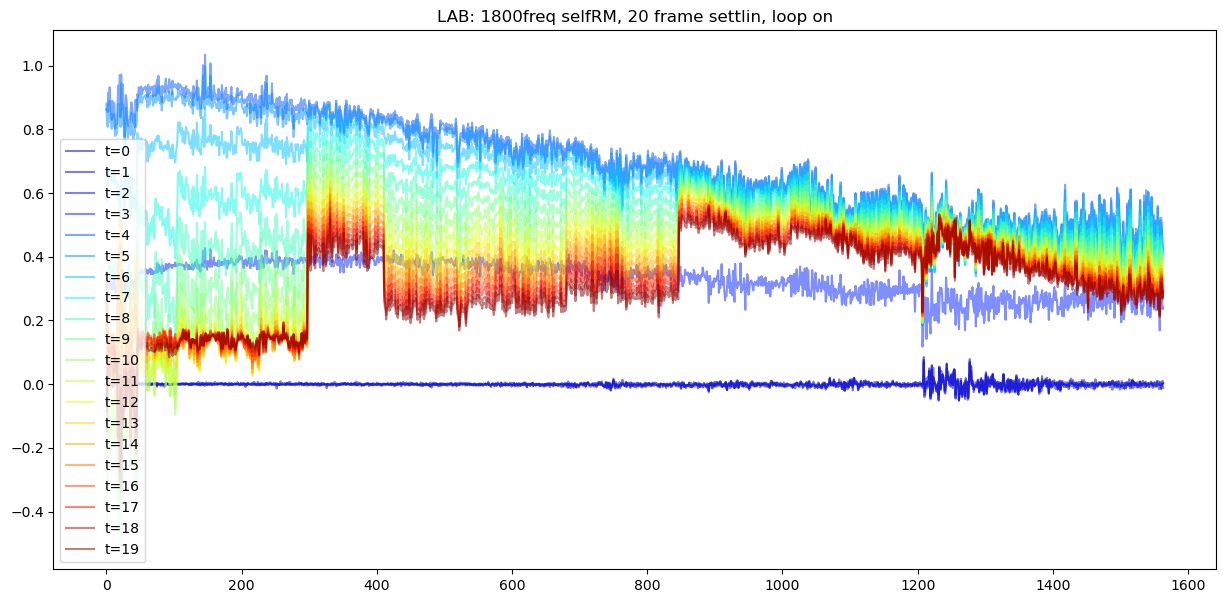

In [7]:
#2023A - 03_11 
fig = plt.figure(figsize=(15,7), facecolor='white')
colors = pl.cm.jet(np.linspace(0,1,20))
for i in range(20):
    plt.plot(np.diag(data_0311_stlng[i]), label=f"t={i}", alpha=0.5, color=colors[i])
plt.legend()
plt.title("LAB: 1800freq selfRM, 20 frame settlin, loop on")
plt.show()

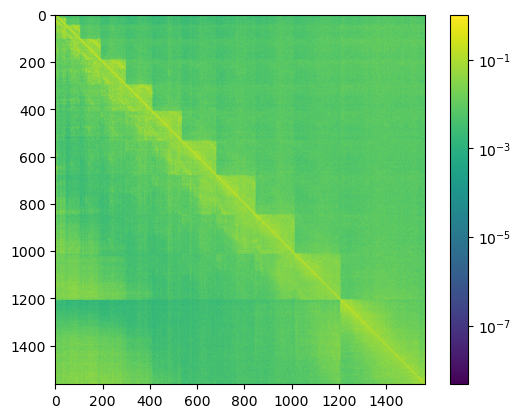

In [13]:
plt.imshow(np.abs(data_0311_stlng[4]), norm='log')
plt.colorbar()

In [11]:
data_0311_stlng = fits.open(RM_dir + 'selfRM_20230311_12_LAB_loopOff_1800_20stlng.fits')[0].data

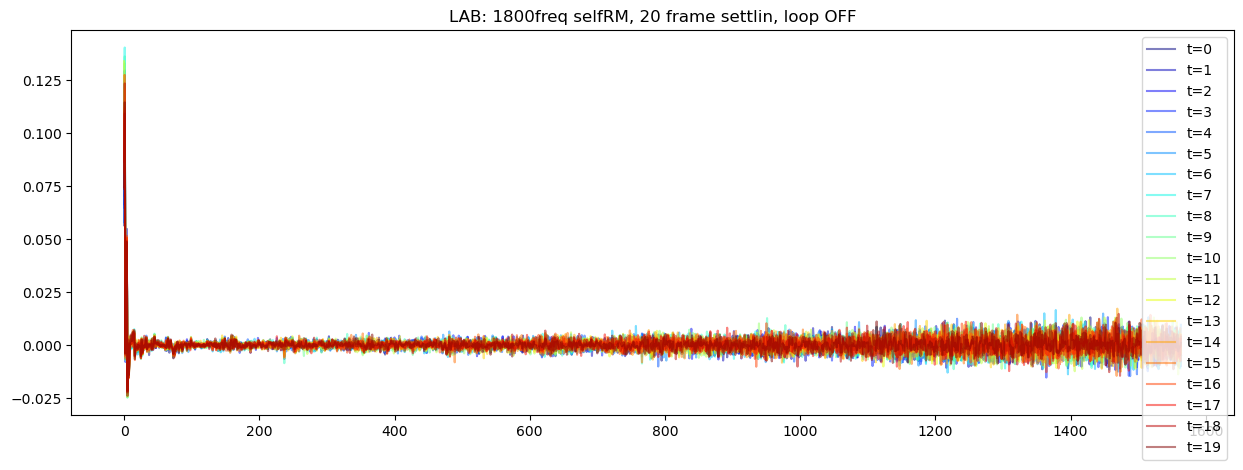

In [13]:
#2023A - 03_11 
fig = plt.figure(figsize=(15,5), facecolor='white')
colors = pl.cm.jet(np.linspace(0,1,20))
for i in range(20):
    plt.plot(np.diag(data_0311_stlng[i]), label=f"t={i}", alpha=0.5, color=colors[i])
plt.legend()
plt.title("LAB: 1800freq selfRM, 20 frame settlin, loop OFF")
plt.show()

## Checking gain applitudes

In [5]:
data_0311_10gain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_fullgains.fits')[0].data
data_0311_06gain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_060gains.fits')[0].data
data_0311_04gain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_040gains.fits')[0].data
data_0311_02gain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_020gains.fits')[0].data
data_0311_00gain = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_000gains.fits')[0].data

gain_data = {"1.0":data_0311_10gain, "0.6":data_0311_06gain,"0.4": data_0311_04gain, "0.2":data_0311_02gain, "0.0":data_0311_00gain}

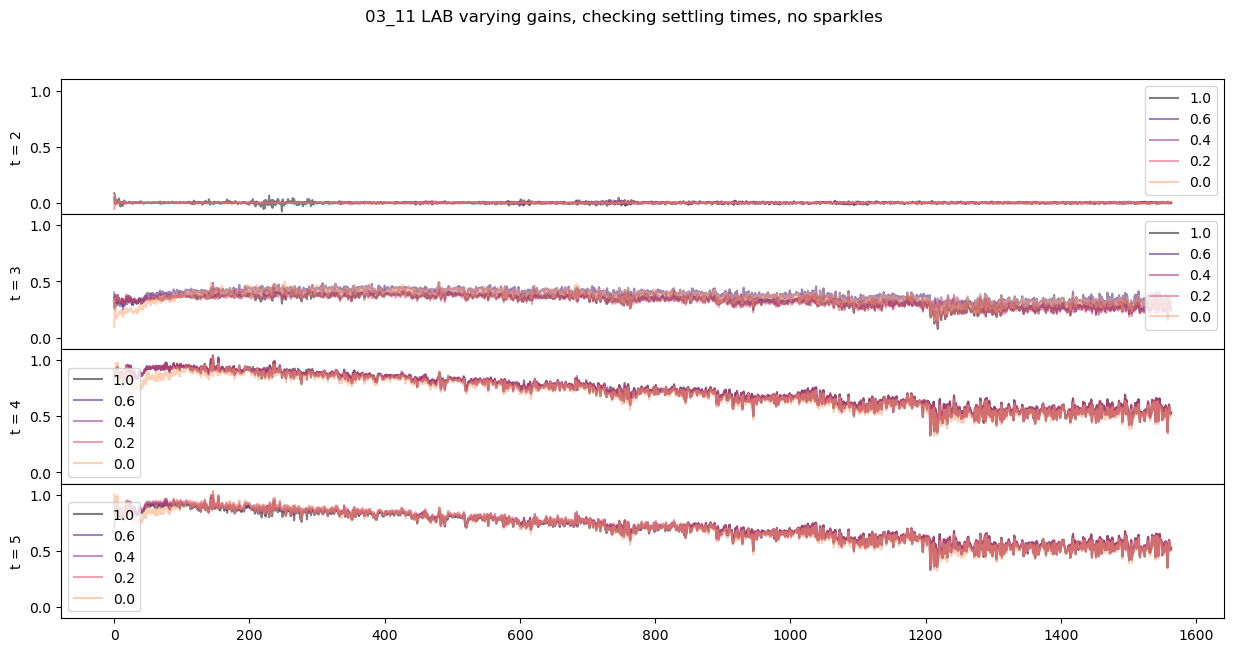

In [6]:
# Checking in-lab loop gains
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 7), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.suptitle("03_11 LAB varying gains, checking settling times, no sparkles")

colors = pl.cm.magma(np.linspace(0,1,6))

for i in range(4):
    axs[i].set_ylabel(f"t = {i+2}")
    for e, key in enumerate(gain_data):
        axs[i].plot(np.diag(gain_data[key][i+2]), label=key, alpha=0.5, color=colors[e])
    axs[i].legend()
    #axs[i].set_xscale('log')
    axs[i].set_ylim(top=1.1, bottom=-0.1)
plt.show()

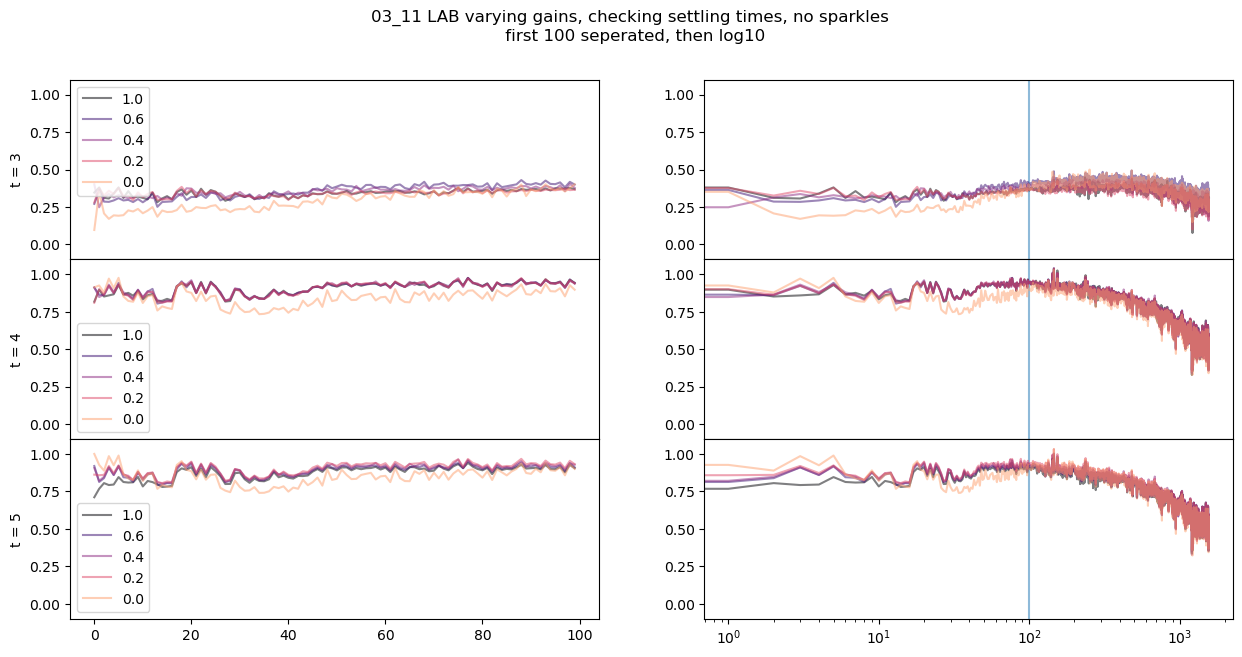

In [18]:
# Checking in-lab loop gains, focus on low order modes
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 7), facecolor='white') #, sharex=True
fig.subplots_adjust(hspace=0)
plt.suptitle("03_11 LAB varying gains, checking settling times, no sparkles \n first 100 seperated, then log10")

colors = pl.cm.magma(np.linspace(0,1,6))

for i in range(3):
    #axs[i,1].set_ylabel(f"t = {i+3}")
    axs[i,1].axvline(100, alpha=0.5)
    for e, key in enumerate(gain_data):
        axs[i,1].plot(np.diag(gain_data[key][i+3]), label=key, alpha=0.5, color=colors[e])
    axs[i,1].set_xscale('log')
    axs[i,1].set_ylim(top=1.1, bottom=-0.1)
    # going to zoom in on first 50
    axs[i,0].set_ylabel(f"t = {i+3}")
    for e, key in enumerate(gain_data):
        axs[i,0].plot(np.diag(gain_data[key][i+3])[:100], label=key, alpha=0.5, color=colors[e])
    #axs[i].set_xscale('log')
    axs[i,0].set_ylim(top=1.1, bottom=-0.1)
    axs[i,0].legend()

plt.show()

# Checking sparkle amplitude affects
four different loop frequencies

### 1800 Hz

In [82]:
data_0311_1800_05amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1800_050amps_20seps.fits')[0].data
data_0311_1800_02amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits')[0].data
data_0311_1800_01amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1800_010amps_20seps.fits')[0].data
data_0311_1800_00amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1800_fullgains.fits')[0].data

amps_data_1800 = {"0.05":data_0311_1800_05amps, "0.02":data_0311_1800_02amps, "0.01": data_0311_1800_01amps, "0.0":data_0311_1800_00amps}

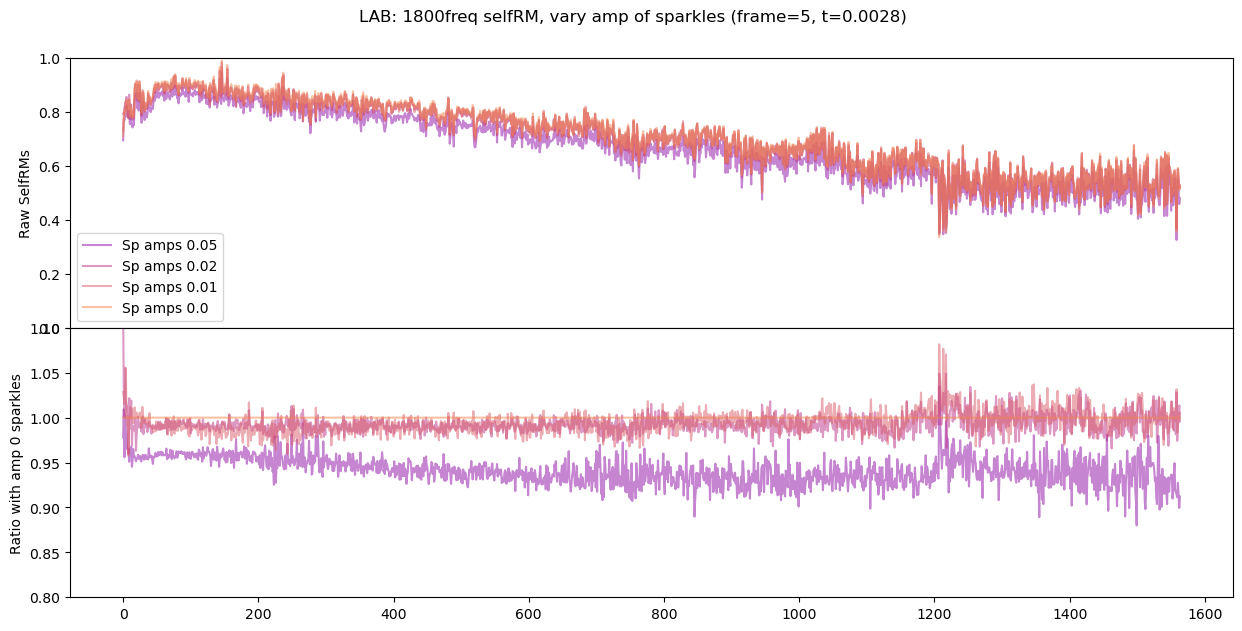

In [83]:
disp_data = amps_data_1800
disp_Hz = 1800
d_frame = 5
d_time = d_frame/disp_Hz

#2023A - 03_11 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 7), facecolor='white', sharex=True)
plt.suptitle(f"LAB: {disp_Hz}freq selfRM, vary amp of sparkles (frame={d_frame}, t={d_time:0.4f})", y=0.95 )
fig.subplots_adjust(hspace=0)
colors = pl.cm.plasma(np.linspace(0.3,.7,4))

axs[0].set_ylabel("Raw SelfRMs")
axs[0].set_ylim(top=1, bottom=0)
for e, key in enumerate(disp_data):
    axs[0].plot(np.diag(disp_data[key][d_frame]), label=f"Sp amps {key}", alpha=0.5, color=colors[e])
axs[0].legend()
axs[1].set_ylabel("Ratio with amp 0 sparkles")
axs[1].set_ylim(top=1.1, bottom=0.8)
for e, key in enumerate(disp_data):
    axs[1].plot(np.diag(disp_data[key][d_frame])/np.diag(disp_data["0.0"][d_frame]), label=key, alpha=0.5, color=colors[e])
plt.show()

## 1200 Hz

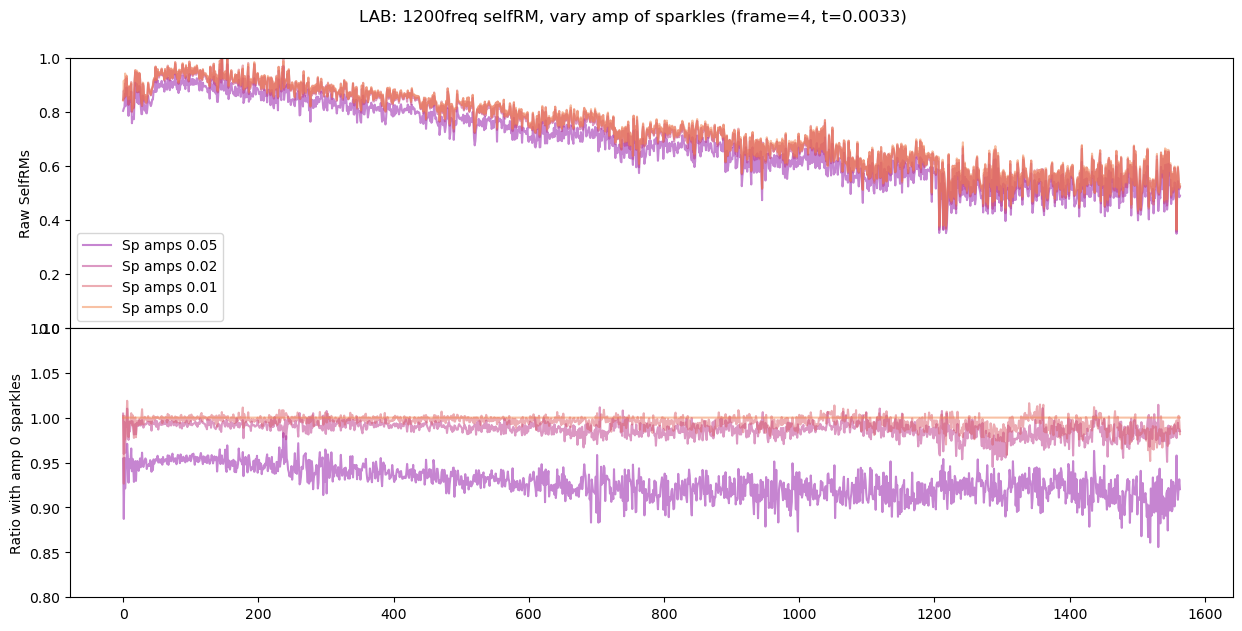

In [84]:
### 1800 Hz
data_0311_1200_05amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1200_050amps_20seps.fits')[0].data
data_0311_1200_02amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1200_020amps_20seps.fits')[0].data
data_0311_1200_01amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_1200_010amps_20seps.fits')[0].data
data_0311_1200_00amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_1200_fullgains.fits')[0].data

amps_data_1200 = {"0.05":data_0311_1200_05amps, "0.02":data_0311_1200_02amps, "0.01": data_0311_1200_01amps, "0.0":data_0311_1200_00amps}

disp_data = amps_data_1200
disp_Hz = 1200
d_frame = 4
d_time = d_frame/disp_Hz

#2023A - 03_11 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 7), facecolor='white', sharex=True)
plt.suptitle(f"LAB: {disp_Hz}freq selfRM, vary amp of sparkles (frame={d_frame}, t={d_time:0.4f})", y=0.95 )
fig.subplots_adjust(hspace=0)
colors = pl.cm.plasma(np.linspace(0.3,.7,4))

axs[0].set_ylabel("Raw SelfRMs")
axs[0].set_ylim(top=1, bottom=0)
for e, key in enumerate(disp_data):
    axs[0].plot(np.diag(disp_data[key][d_frame]), label=f"Sp amps {key}", alpha=0.5, color=colors[e])
axs[0].legend()
axs[1].set_ylabel("Ratio with amp 0 sparkles")
axs[1].set_ylim(top=1.1, bottom=0.8)
for e, key in enumerate(disp_data):
    axs[1].plot(np.diag(disp_data[key][d_frame])/np.diag(disp_data["0.0"][d_frame]), label=key, alpha=0.5, color=colors[e])
plt.show()

## 900 Hz

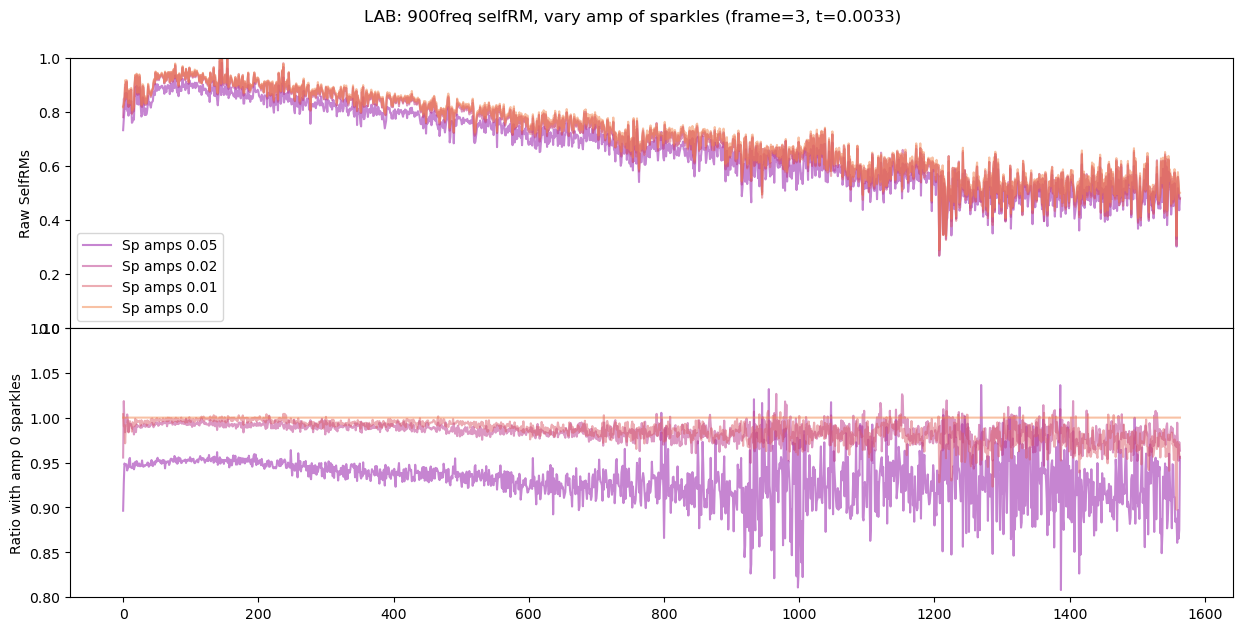

In [85]:
### 1800 Hz
data_0311_0900_05amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0900_050amps_20seps.fits')[0].data
data_0311_0900_02amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0900_020amps_20seps.fits')[0].data
data_0311_0900_01amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0900_010amps_20seps.fits')[0].data
data_0311_0900_00amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_0900_fullgains.fits')[0].data

amps_data_0900 = {"0.05":data_0311_0900_05amps, "0.02":data_0311_0900_02amps, "0.01": data_0311_0900_01amps, "0.0":data_0311_0900_00amps}

disp_data = amps_data_0900
disp_Hz = 900
d_frame = 3
d_time = d_frame/disp_Hz

#2023A - 03_11 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 7), facecolor='white', sharex=True)
plt.suptitle(f"LAB: {disp_Hz}freq selfRM, vary amp of sparkles (frame={d_frame}, t={d_time:0.4f})", y=0.95 )
fig.subplots_adjust(hspace=0)
colors = pl.cm.plasma(np.linspace(0.3,.7,4))

axs[0].set_ylabel("Raw SelfRMs")
axs[0].set_ylim(top=1, bottom=0)
for e, key in enumerate(disp_data):
    axs[0].plot(np.diag(disp_data[key][d_frame]), label=f"Sp amps {key}", alpha=0.5, color=colors[e])
axs[0].legend()
axs[1].set_ylabel("Ratio with amp 0 sparkles")
axs[1].set_ylim(top=1.1, bottom=0.8)
for e, key in enumerate(disp_data):
    axs[1].plot(np.diag(disp_data[key][d_frame])/np.diag(disp_data["0.0"][d_frame]), label=key, alpha=0.5, color=colors[e])
plt.show()



## 600 Hz

In [ ]:
data_0311_0600_05amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0600_050amps_20seps.fits')[0].data
data_0311_0600_02amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0600_020amps_20seps.fits')[0].data
data_0311_0600_01amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_spark_0600_010amps_20seps.fits')[0].data
data_0311_0600_00amps = fits.open(RM_dir + 'selfRM_20230311_12_LAB_noSpark_0600_fullgains.fits')[0].data

amps_data_0600 = {"0.05":data_0311_0600_05amps, "0.02":data_0311_0600_02amps, "0.01": data_0311_0600_01amps, "0.0":data_0311_0600_00amps}

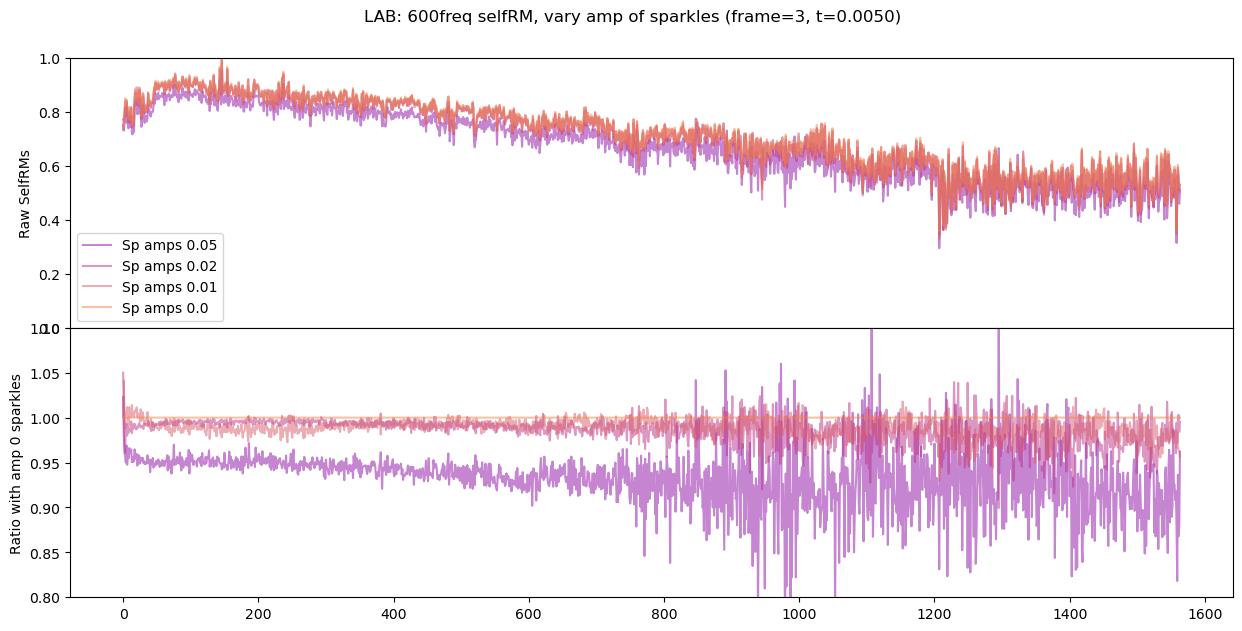

In [86]:
disp_data = amps_data_0600
disp_Hz = 600
d_frame = 3
d_time = d_frame/disp_Hz

#2023A - 03_11 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 7), facecolor='white', sharex=True)
plt.suptitle(f"LAB: {disp_Hz}freq selfRM, vary amp of sparkles (frame={d_frame}, t={d_time:0.4f})", y=0.95 )
fig.subplots_adjust(hspace=0)
colors = pl.cm.plasma(np.linspace(0.3,.7,4))

axs[0].set_ylabel("Raw SelfRMs")
axs[0].set_ylim(top=1, bottom=0)
for e, key in enumerate(disp_data):
    axs[0].plot(np.diag(disp_data[key][d_frame]), label=f"Sp amps {key}", alpha=0.5, color=colors[e])
axs[0].legend()
axs[1].set_ylabel("Ratio with amp 0 sparkles")
axs[1].set_ylim(top=1.1, bottom=0.8)
for e, key in enumerate(disp_data):
    axs[1].plot(np.diag(disp_data[key][d_frame])/np.diag(disp_data["0.0"][d_frame]), label=key, alpha=0.5, color=colors[e])
plt.show()

# Track response per a mode 
over time and frequency

In [ ]:
# for a given frequency, we wannt to trac the mode response over time

